/home/skunk/urop-dp-rel/dp-relational/venv/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/skunk/urop-dp-rel/dp-relational/venv/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


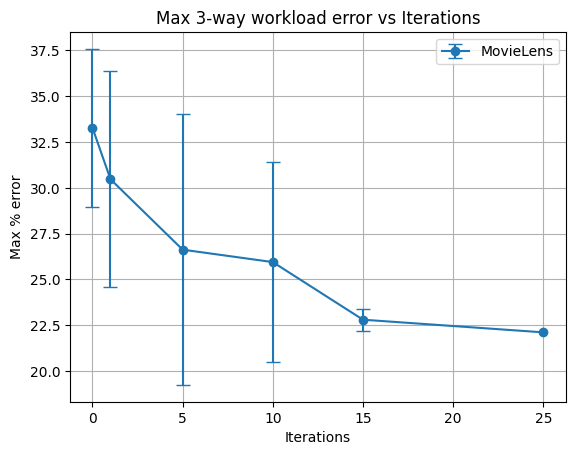

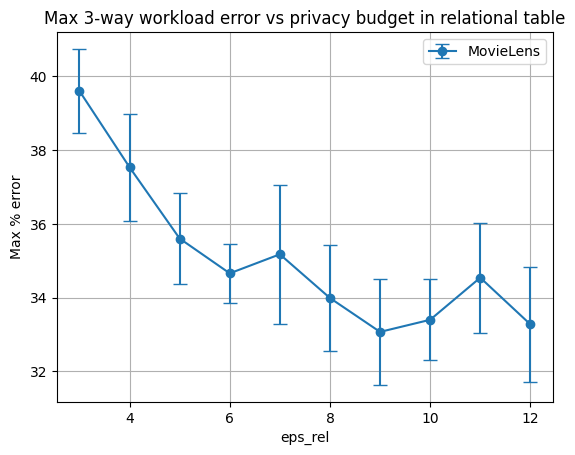

In [1]:
from dp_relational.lib.runner import ModelRunner

import matplotlib.pyplot as plt
import numpy as np

import uuid

def get_max_errors_by_criteria(runner, criteria, filter_exp=lambda x: True, scale=1):
    experiments = runner.get_experiments(save_to="./runs")
    
    results = {}
    for experiment in experiments:
        if filter_exp(experiment):
            criteria_val = criteria(experiment) * scale
            if not (criteria_val in results):
                results[criteria_val] = []
            errors = experiment['errors']
            max_error = 100 * np.max(np.array([np.sum(x) for x in errors]))
            results[criteria_val].append(max_error)

    criteria_vals = []
    ave_errors = []
    error_bars = []

    for criteria_val, res_list in results.items():
        criteria_vals.append(criteria_val)
        res_list_np = np.array(res_list)
        ave_errors.append(np.mean(res_list_np))
        error_bars.append(np.std(res_list_np, ddof=1))

    criteria_vals = np.array(criteria_vals)
    ave_errors = np.array(ave_errors)
    error_bars = np.array(error_bars)

    sorted_idxes = np.argsort(criteria_vals)
    criteria_vals = criteria_vals[sorted_idxes]
    ave_errors = ave_errors[sorted_idxes]
    error_bars = error_bars[sorted_idxes]

    return (criteria_vals, ave_errors, error_bars)

def get_errors_by_criteria(runner, criteria, filter_exp=lambda x: True):
    experiments = runner.get_experiments(save_to="./runs")
    
    results = {}
    for experiment in experiments:
        if filter_exp(experiment):
            criteria_val = criteria(experiment)
            if not (criteria_val in results):
                results[criteria_val] = []
            results[criteria_val].append(experiment['error_ave'])

    criteria_vals = []
    ave_errors = []
    error_bars = []

    for criteria_val, res_list in results.items():
        criteria_vals.append(criteria_val)
        res_list_np = np.array(res_list)
        ave_errors.append(np.mean(res_list_np))
        error_bars.append(np.std(res_list_np, ddof=1))

    criteria_vals = np.array(criteria_vals)
    ave_errors = np.array(ave_errors)
    error_bars = np.array(error_bars)

    sorted_idxes = np.argsort(criteria_vals)
    criteria_vals = criteria_vals[sorted_idxes]
    ave_errors = ave_errors[sorted_idxes]
    error_bars = error_bars[sorted_idxes]

    return (criteria_vals, ave_errors, error_bars)

def get_errors_by_T(runner, filter_exp=lambda x: True):
    return get_errors_by_criteria(runner, 
                                  lambda experiment: experiment['parameters']['T'],
                                  filter_exp)

def get_errors_by_eps_rel(runner, filter_exp=lambda x: True):
    return get_errors_by_criteria(runner, 
                                  lambda experiment: experiment['parameters']['epsilon'] - experiment['parameters']['eps1'] - experiment['parameters']['eps2'],
                                  filter_exp)

def get_errors_by_hyperp(runner, hyperp, hyperpname, filter_exp=lambda x: True):
    return get_errors_by_criteria(runner, 
                                  lambda experiment: experiment['extra_params']['info'][hyperp],
                                  lambda x: filter_exp(x) and (hyperpname in x['extra_params']['run_set']))

def get_max_errors_by_eps_rel(runner, filter_exp=lambda x: True):
    return get_max_errors_by_criteria(runner, 
                                  lambda experiment: experiment['parameters']['epsilon'] - experiment['parameters']['eps1'] - experiment['parameters']['eps2'],
                                  filter_exp)

def get_max_errors_by_hyperp(runner, hyperp, hyperpname, filter_exp=lambda x: True, scale=1):
    return get_max_errors_by_criteria(runner, 
                                  lambda experiment: experiment['extra_params']['info'][hyperp],
                                  lambda x: filter_exp(x) and (hyperpname in x['extra_params']['run_set']), scale=1)

# below datasets are on ojas's machine
EPSILON_PYTORCH_EXPERIMENT_DATASET = uuid.UUID('d40dfd48-160d-11ef-b42b-2ed8cab72dbb')
EPSILON_PYTORCH_SPARSE_EXPERIMENT_DATASET = uuid.UUID('d40dfd48-160d-11ef-b42b-2ed8cab72dbb')
EPSILON_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET = uuid.UUID('d40dfd48-160d-11ef-b42b-2ed8cab72dbb')
EPSILON_PYTORCH_SPARSE_VLRGE_EXPERIMENT_DATASET = uuid.UUID('d40dfd48-160d-11ef-b42b-2ed8cab72dbb')

# below datasets are on ojas's skunk
T_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET = uuid.UUID('d40dfd48-160d-11ef-b42b-2ed8cab72dbb')
EPS_3WAY_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET = uuid.UUID('d40dfd48-160d-11ef-b42b-2ed8cab72dbb')
T_3WAY_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET = uuid.UUID('d40dfd48-160d-11ef-b42b-2ed8cab72dbb')

filter_exp_orig = lambda experiment: experiment['artifacts']['rel_dataset'] == EPSILON_PYTORCH_EXPERIMENT_DATASET
filter_exp_ojas = lambda experiment: experiment['artifacts']['rel_dataset'] == EPSILON_PYTORCH_SPARSE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 2
filter_exp_masked_large = lambda experiment: experiment['artifacts']['rel_dataset'] == EPSILON_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 11
filter_exp_masked_vlrge = lambda experiment: experiment['artifacts']['rel_dataset'] == EPSILON_PYTORCH_SPARSE_VLRGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 20

filter_exp_T_large = lambda experiment: experiment['artifacts']['rel_dataset'] == T_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 100
filter_exp_T_large_smallepsrel = lambda experiment: experiment['artifacts']['rel_dataset'] == T_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 250
filter_exp_eps_3way_large = lambda experiment: experiment['artifacts']['rel_dataset'] == EPS_3WAY_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 150
filter_exp_T_3way_large = lambda experiment: experiment['artifacts']['rel_dataset'] == T_3WAY_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 170
filter_exp_eps_3way_large_corr_T = lambda experiment: experiment['artifacts']['rel_dataset'] == T_3WAY_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 210
filter_exp_T_3way_final = lambda experiment: experiment['artifacts']['rel_dataset'] == T_3WAY_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 1102
filter_exp_T_3way_final_no_reuse = lambda experiment: experiment['extra_params']['run_set'] == 1103
filter_exp_eps_3way_final_no_reuse = lambda experiment: experiment['artifacts']['rel_dataset'] == T_3WAY_PYTORCH_SPARSE_LARGE_EXPERIMENT_DATASET \
    and experiment['extra_params']['run_set'] == 1111
qtr = lambda experiment: experiment['extra_params']['run_set'] == 1984
qtr_w = lambda experiment: experiment['extra_params']['run_set'] == 1986 and experiment['artifacts']['rel_dataset'] == uuid.UUID('84991690-1846-11ef-b13e-2ed8cab72dbb')
qtr_eps = lambda experiment: experiment['extra_params']['run_set'] == 4891 and experiment['artifacts']['rel_dataset'] == uuid.UUID('84991690-1846-11ef-b13e-2ed8cab72dbb')
qtr_w_eps = lambda experiment: experiment['extra_params']['run_set'] == 4892 and experiment['artifacts']['rel_dataset'] == uuid.UUID('84991690-1846-11ef-b13e-2ed8cab72dbb')
pgd_t = lambda experiment: experiment['extra_params']['run_set'] == 947
# pgd_ipums = lambda experiment: experiment['extra_params']['run_set'] == "IPUMS test with the PGD algorithm"
pgd_ipums = lambda experiment: experiment['extra_params']['run_set'] == "Medium PGD, 0.0 guaranteed rels"
pgd_ipums_guar = lambda experiment: experiment['extra_params']['run_set'] == "Medium PGD, 0.08 guaranteed rels"
pgd_ipums_v2_large = lambda experiment: experiment['extra_params']['run_set'] == "PGD attempt with medium size tables"
pgd_ipums_eps = lambda experiment: experiment['extra_params']['run_set'] == "Medium PGD, eps study"
pgd_ipums_multi = lambda experiment: experiment['extra_params']['run_set'][:10] == "Medium PGD" and 'multiparameter' in experiment['extra_params']['run_set']
pgd_ipums_multi_eps = lambda experiment: experiment['extra_params']['run_set'][:10] == "Medium PGD" and 'multiparameter' in experiment['extra_params']['run_set'] and 'eps' in experiment['extra_params']['run_set']

pgd_ipums_multi2 = lambda experiment: experiment['extra_params']['run_set'][:14] == "M3L_MediumPGD_"
pgd_ipums_multi2_eps = lambda experiment: experiment['extra_params']['run_set'][:14] == "M3L_MediumPGD_" and 'eps' in experiment['extra_params']['run_set']

pgd_ipums_multi2_mst_eps = lambda experiment: experiment['extra_params']['run_set'] == "M3L_MediumPGD_eps" and experiment['extra_params']['info']['synth_strat'] == 'mst'
pgd_ipums_multi2_aim_eps = lambda experiment: experiment['extra_params']['run_set'] == "M3L_MediumPGD_eps" and experiment['extra_params']['info']['synth_strat'] == 'aim'


pgd_ipums_multi3 = lambda experiment: experiment['extra_params']['run_set'][:18] == "00IPUMS_MediumPGD_"
pgd_ipums_multi3_eps = lambda experiment: experiment['extra_params']['run_set'][:18] == "00IPUMS_MediumPGD_" and 'eps' in experiment['extra_params']['run_set']

pgd_ipums_multi3_mst_eps = lambda experiment: experiment['extra_params']['run_set'] == "00IPUMS_MediumPGD_eps" and experiment['extra_params']['info']['synth_strat'] == 'mst'
pgd_ipums_multi3_aim_eps = lambda experiment: experiment['extra_params']['run_set'] == "00IPUMS_MediumPGD_eps" and experiment['extra_params']['info']['synth_strat'] == 'aim'


runner = ModelRunner(save_to='./runs')

# ============ T Experiments ============
# Ts, ave_errors, error_bars = get_errors_by_T(runner, filter_exp_T_large)
# plt.figure()
# plt.errorbar(Ts, ave_errors, error_bars, fmt='-o', capsize=5, label="Large syntables")
# plt.title("Average workload error vs iterations (eps_rel = 2.0)")
# plt.xlabel("Iterations (T)")
# plt.ylabel("Average % error")
# plt.legend()
# plt.grid()
# plt.show()

# ============ Epsilon Experiments ============

# epsilons, ave_errors, error_bars = get_errors_by_eps_rel(runner, filter_exp_orig)
# epsilons_o, ave_errors_o, error_bars_o = get_errors_by_eps_rel(runner, filter_exp_ojas)
# epsilons_l, ave_errors_l, error_bars_l = get_errors_by_eps_rel(runner, pgd_ipums_eps)
# epsilons_v, ave_errors_v, error_bars_v = get_errors_by_eps_rel(runner, filter_exp_masked_vlrge)

#plt.figure()
# plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label="Original generation")
# plt.errorbar(epsilons_o, ave_errors_o, error_bars_o, fmt='-o', capsize=5, label="Ojas masking method")
#plt.errorbar(epsilons_l, ave_errors_l, error_bars_l, fmt='-o', capsize=5, label="PGD")
#plt.title("Average workload error vs privacy budget")
#plt.xlabel("Relational privacy budget")
#plt.ylabel("Average % error")
#plt.legend()
#plt.grid()
#plt.show()

# ============ T 3-way Experiments ============
#Ts, ave_errors, error_bars = get_errors_by_T(runner, filter_exp_T_3way_final)
#Ts, ave_errors, error_bars = get_errors_by_T(runner, qtr)
#Ts_w, ave_errors_w, error_bars_w = get_errors_by_T(runner, qtr_w)
# T_p, ave_errors_p, error_bars_p = get_errors_by_T(runner, pgd_t)
##T_p, ave_errors_p, error_bars_p = get_errors_by_T(runner, pgd_ipums)
##T_g, ave_errors_g, error_bars_g = get_errors_by_T(runner, pgd_ipums_guar)
##plt.figure()

#plt.errorbar(Ts, ave_errors, error_bars, fmt='-o', capsize=5, label="5 workloads, random")
#plt.errorbar(Ts_w, ave_errors_w, error_bars_w, fmt='-o', capsize=5, label="5 workloads, worst")
##plt.errorbar(T_p, ave_errors_p, error_bars_p, fmt='-o', capsize=5, label="PGD medium (0 guaranteed)")
##plt.errorbar(T_g, ave_errors_g, error_bars_g, fmt='-o', capsize=5, label="PGD medium (50% guaranteed)")
##plt.title("Average 3-way workload error vs iterations (eps_rel = 2.0)")
##plt.xlabel("Iterations (T)")
##plt.ylabel("Average % error")
##plt.legend()
##plt.grid()
##plt.show()

# ============ Epsilon 3-way Experiments ============
#epsilons, ave_errors, error_bars = get_errors_by_eps_rel(runner, qtr_eps)
#epsilons_w, ave_errors_w, error_bars_w = get_errors_by_eps_rel(runner, qtr_w_eps)

#plt.figure()
#plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label="5 workloads, random")
#plt.errorbar(epsilons_w, ave_errors_w, error_bars_w, fmt='-o', capsize=5, label="5 workloads, worst")
#plt.title("Average 3-way workload error vs privacy budget, 5 workloads (T = 10)")
#plt.xlabel("Relational privacy budget")
#plt.ylabel("Average % error")
#plt.legend()
#plt.grid()
#plt.show()

# =========== Multiparameter Experiments ===========
hyperp_ins = ['Tconst', 'q_reuse', 'k_new']#'g_rels']
hyperp_in_names = ['Tfinal', 'q_reuse', 'knew']#'g_in']
hyperp_in_labels = ['Iterations', '# queries used for training each iteration', 'New queries added per iteration']
idx = 0
hyperp_in = hyperp_ins[idx]
hyperp_name = hyperp_in_names[idx]
epsilons, ave_errors, error_bars = get_max_errors_by_hyperp(runner, hyperp_in, hyperp_name, pgd_ipums_multi2)#pgd_ipums_multi)
# epsilons2, ave_errors2, error_bars2 = get_max_errors_by_hyperp(runner, hyperp_in, hyperp_name, pgd_ipums_multi3)#pgd_ipums_multi)
plt.figure()
plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label="MovieLens")
# plt.errorbar(epsilons2, ave_errors2, error_bars2, fmt='-o', capsize=5, label="MST")
plt.title(f"Max 3-way workload error vs {hyperp_in_labels[idx]}")
plt.xlabel(hyperp_in_labels[idx])
plt.ylabel("Max % error")
plt.legend()
plt.grid()
plt.show()

# epsilons, ave_errors, error_bars = get_max_errors_by_eps_rel(runner, pgd_ipums_multi3_eps)
epsilons_a, ave_errors_a, error_bars_a = get_max_errors_by_eps_rel(runner, pgd_ipums_multi2_eps)
plt.figure()
# plt.errorbar(epsilons, ave_errors, error_bars, fmt='-o', capsize=5, label='MST')
plt.errorbar(epsilons_a, ave_errors_a, error_bars_a, fmt='-o', capsize=5, label='MovieLens')
plt.title("Max 3-way workload error vs privacy budget in relational table")
plt.xlabel('eps_rel')
plt.ylabel("Max % error")
plt.legend()
plt.grid()
plt.show()

In [5]:
Ts_n, ave_errors_n, error_bars_n = get_errors_by_T(runner, filter_exp_T_3way_final_no_reuse)

In [6]:
Ts_n

array([], dtype=float64)

In [14]:
def get_experiment_params(runner, filter_exp):
    experiments = runner.get_experiments(save_to="./runs")
    
    results = {}
    for experiment in experiments:
        if filter_exp(experiment):
            r_s = experiment['extra_params']['run_set']
            if r_s not in results:
                results[r_s] = 0
            if r_s == "00IPUMS_MediumPGD_Tfinal":
                print(experiment)
            results[r_s] += 1
    return results

In [15]:
print(get_experiment_params(runner, lambda x: True))

{'run_id': UUID('75b81674-7fea-11ef-8a85-bae7b799ac02'), 'parameters': {'dataset_generator': '<lambda>', 'n_syn1': 10000, 'n_syn2': 10000, 'synth': 'mst', 'epsilon': 4.0, 'eps1': 1.0, 'eps2': 1.0, 'k': 3, 'dmax': 4, 'qm_generator': 'qm_generator_torch', 'cross_generation_strategy': 'cross_generator_torch', 'T': 15}, 'extra_params': {'info': {'fraction': 0.05, 'table_size': 10000, 'Tconst': 0, 'alpha': 0.2, 'k_new': 3, 'worst': True, 'q_reuse': 8, 'g_rels': 0.08}, 'run_set': '00IPUMS_MediumPGD_Tfinal'}, 'times': {'qm_init': 2.8907418623566628, 'cross_answers_gen': 9.056553579866886}, 'error_ave': 5.9512180473826355, 'errors': [array([1.73814459e-02, 4.77957609e-04, 1.48243693e-03, 1.08366442e-03,
       6.61348212e-04, 5.33534203e-03, 1.54298279e-02, 2.65774184e-04,
       2.86912565e-04, 1.37446224e-03, 3.36410745e-03, 6.18094495e-06,
       2.31362346e-02, 1.35537773e-03, 7.76867720e-04, 2.70480988e-03,
       3.45062456e-05, 6.18113518e-03, 2.20747629e-02, 3.29070027e-05,
       1.50

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



{'run_id': UUID('291e771c-7ff0-11ef-ba85-bae7b799ac02'), 'parameters': {'dataset_generator': '<lambda>', 'n_syn1': 10000, 'n_syn2': 10000, 'synth': 'mst', 'epsilon': 4.0, 'eps1': 1.0, 'eps2': 1.0, 'k': 3, 'dmax': 4, 'qm_generator': 'qm_generator_torch', 'cross_generation_strategy': 'cross_generator_torch', 'T': 15}, 'extra_params': {'info': {'fraction': 0.05, 'table_size': 10000, 'Tconst': 5, 'alpha': 0.2, 'k_new': 3, 'worst': True, 'q_reuse': 8, 'g_rels': 0.08}, 'run_set': '00IPUMS_MediumPGD_Tfinal'}, 'times': {'qm_init': 2.701742086559534, 'cross_answers_gen': 37.3876471593976}, 'error_ave': 4.620734705622418, 'errors': [array([2.08795803e-02, 6.88087167e-04, 3.16392157e-04, 6.17246509e-04,
       1.59418403e-03, 1.13758083e-03, 1.40305741e-02, 2.00643726e-04,
       6.45923256e-04, 7.02106015e-03, 9.91820801e-05, 3.27110632e-03,
       6.57839873e-03, 6.55750862e-04, 6.22386012e-04, 6.05929286e-04,
       7.34133111e-04, 2.44759616e-03, 1.39124494e-02, 1.89857864e-03,
       3.83692

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

